In [1]:
# Dependencies

import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
from pathlib import Path
from IPython.display import display, Markdown
import numpy as np

In [2]:
# Import data from CSV file

file = Path('../Resources/Votes.csv')

In [3]:
# Create dataframe

df = pd.read_csv(file, encoding="ISO-8859-1")

In [4]:
# Preview df

df.head()

,Election Year,Democratic Votes,Republican Votes,WINNER
0,1856,"1,836,072","1,342,345",Democratic
1,1860,"1,375,157","1,866,452",Republican
2,1864,"1,805,237","2,218,388",Republican
3,1868,"2,703,249","3,013,791",Republican
4,1872,"2,834,761","3,598,235",Republican


In [5]:
# Change strings to numeric format and create column for total votes for each election year

df['Democratic Votes'] = df['Democratic Votes'].astype(str).str.replace(',', '')
df['Republican Votes'] = df['Republican Votes'].astype(str).str.replace(',', '')
df['Democratic Votes'] = pd.to_numeric(df['Democratic Votes'])
df['Republican Votes'] = pd.to_numeric(df['Republican Votes'])
df['Total Votes'] = df['Democratic Votes'] + df['Republican Votes']
df.head()

,Election Year,Democratic Votes,Republican Votes,WINNER,Total Votes
0,1856,1836072,1342345,Democratic,3178417
1,1860,1375157,1866452,Republican,3241609
2,1864,1805237,2218388,Republican,4023625
3,1868,2703249,3013791,Republican,5717040
4,1872,2834761,3598235,Republican,6432996


In [6]:
# Create columns for each party's percentage of votes each year

df['Democratic Percentage'] = (df['Democratic Votes'] / df['Total Votes']) * 100
df['Republican Percentage'] = (df['Republican Votes'] / df['Total Votes']) * 100
df.head()

,Election Year,Democratic Votes,Republican Votes,WINNER,Total Votes,Democratic Percentage,Republican Percentage
0,1856,1836072,1342345,Democratic,3178417,57.766869,42.233131
1,1860,1375157,1866452,Republican,3241609,42.422050,57.577950
2,1864,1805237,2218388,Republican,4023625,44.865936,55.134064
3,1868,2703249,3013791,Republican,5717040,47.284067,52.715933
4,1872,2834761,3598235,Republican,6432996,44.065953,55.934047


In [7]:
# Create separate df's for before women's suffrage in 1920, between 1920 and 1980, and after 1980
df_before_suffrage = df[df['Election Year '] < 1920]
df_after_1920 = df[(df['Election Year '] >= 1920) & (df['Election Year '] < 1980)]
df_after_1980 = df[df['Election Year '] >= 1980]

# Preview "before suffrage" df
df_before_suffrage.head()

,Election Year,Democratic Votes,Republican Votes,WINNER,Total Votes,Democratic Percentage,Republican Percentage
0,1856,1836072,1342345,Democratic,3178417,57.766869,42.233131
1,1860,1375157,1866452,Republican,3241609,42.422050,57.577950
2,1864,1805237,2218388,Republican,4023625,44.865936,55.134064
3,1868,2703249,3013791,Republican,5717040,47.284067,52.715933
4,1872,2834761,3598235,Republican,6432996,44.065953,55.934047


In [8]:
# Preview "after 1980" df

df_after_1980.head()

,Election Year,Democratic Votes,Republican Votes,WINNER,Total Votes,Democratic Percentage,Republican Percentage
31,1980,35480115,43903230,Republican,79383345,44.694659,55.305341
32,1984,37577352,54455472,Republican,92032824,40.830380,59.169620
33,1988,41809074,48886097,Republican,90695171,46.098457,53.901543
34,1992,44909806,39104545,Democratic,84014351,53.454922,46.545078
35,1996,47401185,39198755,Democratic,86599940,54.735817,45.264183


In [9]:
# Create contingency tables for chi square testing
contingency_table_before = pd.crosstab(df_before_suffrage['WINNER'], df_before_suffrage['Election Year '])
contingency_table_between = pd.crosstab(df_after_1920['WINNER'], df_after_1920['Election Year '])
contingency_table_after = pd.crosstab(df_after_1980['WINNER'], df_after_1980['Election Year '])

# Display contingency table before suffrage
contingency_table_before

Election Year,1856,1860,1864,1868,1872,1876,1880,1884,1888,1892,1896,1900,1904,1908,1912,1916
WINNER,,,,,,,,,,,,,,,,
Democratic,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1
Republican,0,1,1,1,1,1,1,0,1,0,1,1,1,1,0,0


In [10]:
# Display contingency table after suffrage

contingency_table_after

Election Year,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016,2020
WINNER,,,,,,,,,,,
Democratic,0,0,0,1,1,0,0,1,1,0,1
Republican,1,1,1,0,0,1,1,0,0,1,0


In [11]:
# Perform chi-square tests

chi2_before, p_before, dof_before, expected_before = chi2_contingency(contingency_table_before)
chi2_between, p_between, dof_between, expected_between = chi2_contingency(contingency_table_between)
chi2_after, p_after, dof_after, expected_after = chi2_contingency(contingency_table_after)

In [12]:
#Statistical Analysis

# Print results
print("Before women's suffrage:")
print("Chi-square statistic:", chi2_before)
print("p-value:", p_before)
print("\nBetween 1920 and 1980:")
print("Chi-square statistic:", chi2_between)
print("p-value:", p_between)
print("\nAfter 1980:")
print("Chi-square statistic:", chi2_after)
print("p-value:", p_after)

Before women's suffrage:
Chi-square statistic: 16.0
p-value: 0.38205166150286374

Between 1920 and 1980:
Chi-square statistic: 14.999999999999998
p-value: 0.37815469432346926

After 1980:
Chi-square statistic: 10.999999999999998
p-value: 0.35751800242792586


In [13]:
# Written Analysis

analysis = "The chi-square tests performed on the 'Winner' and 'Election Year' variables find no statistically significant correlation between these two variables during the historical period before the introduction of women's suffrage, after the beginning of women's suffrage in 1920, and also after 1980 when women started voting at higher rates than men (https://cawp.rutgers.edu/facts/voters/gender-differences-voter-turnout#GGN). Therefore, it can be concluded that the historic demographic shifts in women's electoral participation most likely has not altered the course of national popular vote outcomes for presidential elections. However, it is important to note that this study is limited in that it does not factor in other historical conditions such as war, economics, or abortion rights."

display(Markdown(analysis))



The chi-square tests performed on the 'Winner' and 'Election Year' variables find no statistically significant correlation between these two variables during the historical period before the introduction of women's suffrage, after the beginning of women's suffrage in 1920, and also after 1980 when women started voting at higher rates than men (https://cawp.rutgers.edu/facts/voters/gender-differences-voter-turnout#GGN). Therefore, it can be concluded that the historic demographic shifts in women's electoral participation most likely has not altered the course of national popular vote outcomes for presidential elections. However, it is important to note that this study is limited in that it does not factor in other historical conditions such as war, economics, or abortion rights.

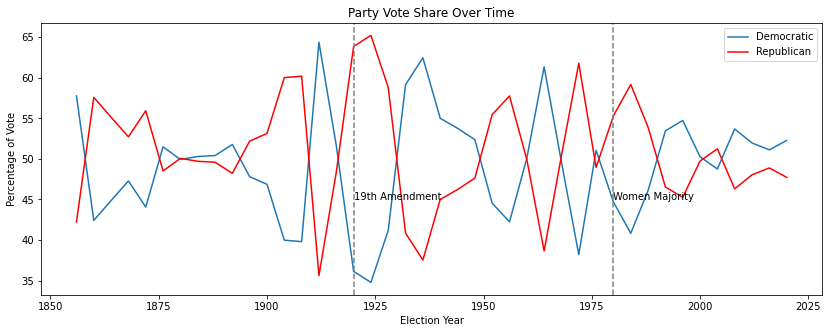

In [20]:
# Plot Vote Percentage Line Chart  
plt.figure(figsize=(14, 5))
plt.plot(df['Election Year '], df['Democratic Percentage'], label='Democratic') 
plt.plot(df['Election Year '], df['Republican Percentage'], color='red', label='Republican')
plt.axvline(1920, color='grey', linestyle='--')
plt.annotate('19th Amendment', (1920, 45))
plt.axvline(1980, color='grey', linestyle='--')
plt.annotate('Women Majority', (1980, 45))
plt.title('Party Vote Share Over Time') 
plt.xlabel('Election Year')
plt.ylabel('Percentage of Vote')
plt.legend()
plt.show()

In [21]:
# Combine Line Chart Analysis
line_analysis = "Since the late 1800's-decades before the passage of the 19th Amendment-American presidential elections have followed a very consistent cycle with neither party able to hold on to dominance for very long.  The winner cycles appear to be unaffected by the entrance of women voters into the electorate, and by their shift into the majority of the electorate.  However, it is interesting to note that Republicans accomplished their historically best performances right after the passage of the 19th Amendment, which also coincides with the end of World War I.  It is also interesting that election races have become notably tighter after 1980.  Understanding whether this new pattern is due to gender demographic shifts vs. other factors would require more research."
display(Markdown(line_analysis))

Since the late 1800's-decades before the passage of the 19th Amendment-American presidential elections have followed a very consistent cycle with neither party able to hold on to dominance for very long.  The winner cycles appear to be unaffected by the entrance of women voters into the electorate, and by their shift into the majority of the electorate.  However, it is interesting to note that Republicans accomplished their historically best performances right after the passage of the 19th Amendment, which also coincides with the end of World War I.  It is also interesting that election races have become notably tighter after 1980.  Understanding whether this new pattern is due to gender demographic shifts vs. other factors would require more research.

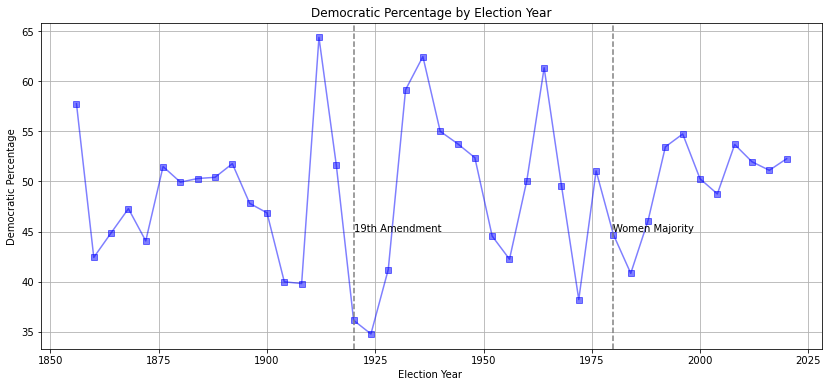

In [16]:
# Line chart for Democratic percentage vs. election year
plt.figure(figsize=(14, 6))
plt.plot(df['Election Year '], df['Democratic Percentage'], c='b', marker='s', label='Democratic', alpha=0.5)
plt.axvline(1920, color='grey', linestyle='--', label='1920 (19th Amendment)')
plt.annotate('19th Amendment', (1920, 45))
plt.title('Democratic Percentage by Election Year')
plt.axvline(1980, color='grey', linestyle='--')
plt.annotate('Women Majority', (1980, 45))
plt.xlabel('Election Year ')
plt.ylabel('Democratic Percentage')
plt.grid(True)
plt.show()

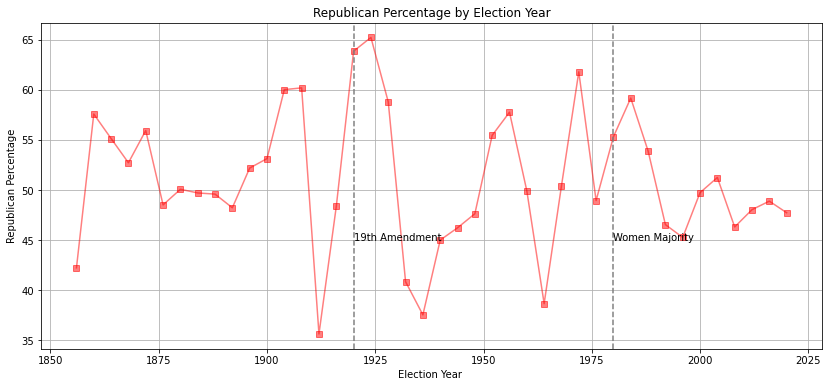

In [17]:
# Line chart for Republican percentage vs. election year
plt.figure(figsize=(14, 6))
plt.plot(df['Election Year '], df['Republican Percentage'], c='r', marker='s', label='Republican', alpha=0.5)
plt.axvline(1920, color='grey', linestyle='--', label='1920 (19th Amendment)')
plt.annotate('19th Amendment', (1920, 45))
plt.axvline(1980, color='grey', linestyle='--', label='1980 (Women Majority)')
plt.annotate('Women Majority', (1980, 45))
plt.title('Republican Percentage by Election Year')
plt.xlabel('Election Year ')
plt.ylabel('Republican Percentage')
plt.grid(True)
plt.show()

In [18]:
# Chart Analysis

chart_analysis = "The individual line graphs for both parties display consistent up-down trend patterns that begin well before the passing of the 19th Amendment in 1920.  The patterns continue after 1920, although with less exaggeration after women started voting at higher rates than men since 1980."

display(Markdown(chart_analysis))

The individual line graphs for both parties display consistent up-down trend patterns that begin well before the passing of the 19th Amendment in 1920.  The patterns continue after 1920, although with less exaggeration after women started voting at higher rates than men since 1980.